# Numpy

https://numpy.org/devdocs/user/absolute_beginners.html 

In [1]:
import numpy as np 

In [3]:
x = [1, 2, 3] 
y = [-3, -2, -1] 

In [4]:
print(x + y)

[1, 2, 3, -3, -2, -1]


In [6]:
print(3 * x)

(1, 2, 3, 1, 2, 3, 1, 2, 3)


In [7]:
print(x * y)

TypeError: can't multiply sequence by non-int of type 'tuple'

In [5]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.6 
x = np.array(x)
y = np.array(y)
print(x + y)
print(3 * x)
print(x * y)

[-2  0  2]
[3 6 9]
[-3 -4 -3]


In [6]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.7 ~ 8 
A = np.array([[9, 3], [-2, 0]])
print(A)
# Addition 
print(A+A)
# 1) Scalar multiplication 
print(A*A)

[[ 9  3]
 [-2  0]]
[[18  6]
 [-4  0]]
[[81  9]
 [ 4  0]]


In [7]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.9 
# 2) Matrix to Matrix multiplication 
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html 
B = np.array([[1, -4], [2, 5]])
print(np.matmul(A , B))
print(np.matmul(B, A))

[[ 15 -21]
 [ -2   8]]
[[17  3]
 [ 8  6]]


In [8]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.9 
# 3) Matrix to Vector multiplication 
x = np.array([1, 2]) 
print(np.matmul(A,x))

[15 -2]


In [9]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.9 
# 4) Transposition 
print(A.T)

[[ 9 -2]
 [ 3  0]]


In [10]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.10 
# 5) Inverse of Matrix 
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html 
from numpy.linalg import inv 
print(A)
print(inv(A))
print(np.matmul(A, inv(A)))
print(np.matmul(inv(A), A))

[[ 9  3]
 [-2  0]]
[[ 0.         -0.5       ]
 [ 0.33333333  1.5       ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [24]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.10 
# 6) Dot Product 
x = np.array([1, 3, -5])
y = np.array([4, -2, -1])
print(np.dot(x,y))

3


In [11]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.10 
# 7) Hadamard Product 
print(A)
print(B)
print(A*B)

[[ 9  3]
 [-2  0]]
[[ 1 -4]
 [ 2  5]]
[[  9 -12]
 [ -4   0]]


# 수치 편미분 Numerical Partial Derivative 

In [2]:
# 수치 미분 함수 Numerical Differentiation function 
# 미분적분학 p.110, 115 
# 밑바닥부터 시작하는 딥러닝 p.123 

def numerical_diff(f, x): 
    h = 1e-5 # 0.00001 
    #return ( f(x + h) - f(x - h) ) / (2 * h)   # Symmetric derivative 
    return (f(x + h) - f(x)) / h                # Derivative 

In [15]:
# # [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.23 
# 밑바닥부터 시작하는 딥러닝 p.125
# rice_bowl_function(x0, x1) = (x0)^2 + (x1)^2 
def rice_bowl_function(x): 
    return 2*x[0]**2 + 4*x[0]*x[1]
    # return None 

The partial differential of rice_bowl_function with respect to x0 -> 

The partial differential of rice_bowl_function with respect to x1 -> 

The total differential of rice_bowl_function -> 

(x0) = 3, (x1) = 4 -> df/dx0 = ? 

In [41]:
# 밑바닥부터 시작하는 딥러닝 p.126
# (x0)^2 + 4^2
def rice_bowl_function_wrt_x0(x0): 
     x1 = 0 
    return 2*x0**2 + 4*x1*x0;

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [42]:
numerical_diff(rice_bowl_function_wrt_x0, 3.0)

NameError: name 'rice_bowl_function_wrt_x0' is not defined

(x0) = 3, (x1) = 4 -> df/dx1 = ? 

In [43]:
# 밑바닥부터 시작하는 딥러닝 p.127 
# 3^2 + (x1)^2 
def rice_bowl_function_wrt_x1(x1): 
    x0 = 3
    return x0**2 + x1**2

In [44]:
numerical_diff(rice_bowl_function_wrt_x1, 4.0)

8.00000999952033

# 기울기 Gradient 

In [18]:
import numpy as np

In [47]:
# 밑바닥부터 시작하는 딥러닝 p.127 
def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
    h = 1e-4 # 0.0001 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
    
    # The partial differential of function f with respect to x_idx 
    for idx in range(x.size): 
        tmp_val = x[idx] 

        # f(x+h)
        x[idx] = tmp_val + h  ## x0 관점 에서 h 만큼을 이동한것이다 . x1 에 변화는 없다.  
        f_x_plus_h = f(x+h) ## x0 +h 값을 더한 fx 함수값을 지정 
         
        # f(x) 
        x[idx] = tmp_val 
        fx = f(x) 
        
        grad[idx] = (f_x_plus_h + fx)/h
        
        #x[idx] = tmp_val 
    
    return grad

In [56]:
# 밑바닥부터 시작하는 딥러닝 p.128q
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([1,2]))

array([200016, 200016])

In [29]:
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([0.0, 2.0]))

array([80004.0005, 80008.0005])

In [30]:
numerical_gradient_of_scalar_function_wrt_vector_x(rice_bowl_function, np.array([3.0, 0.0]))

array([180012.0005, 180006.0005])

In [31]:
# 밑바닥부터 시작하는 딥러닝 p.129
import matplotlib.pylab as plt

In [11]:
def numerical_gradient(f, X): 
    def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
        h = 1e-4 # 0.0001 
        grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
        
        # The partial differential of function f with respect to x_idx 
        for idx in range(x.size): 
            tmp_val = x[idx] 

            # f(x+h)
            x[idx] = tmp_val + h 
            f_x_plus_h = f(x)
            
            # f(x) 
            x[idx] = tmp_val 
            fx = f(x) 
            grad[idx] = (f_x_plus_h - fx) / h 
            
            #x[idx] = tmp_val 
        
        return grad
    
    if X.ndim == 1:
        return numerical_gradient_of_scalar_function_wrt_vector_x(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_of_scalar_function_wrt_vector_x(f, x)
        
        return grad 

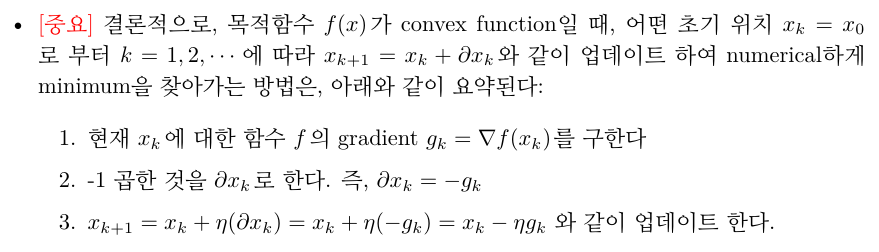

In [22]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.21 ~ 31  
# [Day2]_Gradient Descent and Searching Space Topology.pdf p.35 
# 밑바닥부터 시작하는 딥러닝 p.131
def gradient_descent(f, x_0, eta=0.01, max_iter=100): 
    x_k = x_0 
    
    for k in range(max_iter): 
        
        g_k = numerical_gradient(f,x_k)
        partial_x_k = -g_k 
        x_k_plus_1 = x_k + eta*partial_x_k
        

        x_k = x_k_plus_1
        
    return x_k

In [16]:
# 밑바닥부터 시작하는 딥러닝 p.132
def rice_bowl_function(x):  #x1
    return x[0]**2 + x[1]**2

In [24]:
x_0 = np.array([3.0, 4.0])

In [38]:
gradient_descent(rice_bowl_function, x_0=x_0, eta=0.1, max_iter=100)

array([-4.99993889e-05, -4.99991852e-05])

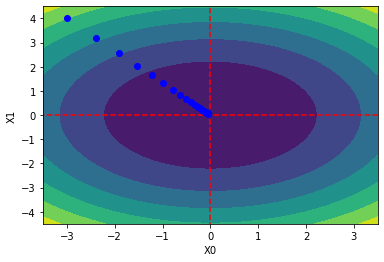

In [15]:
eta = 0.1
max_iter = 20

def _gradient_descent(f, x_0, eta=0.01, max_iter=100):
    x = x_0
    x_history = []

    for k in range(max_iter):
        x_history.append( x.copy() )

        g = numerical_gradient(f, x) 
        x = x - eta * g 

    return x, np.array(x_history)

def _function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

x_0 = np.array([-3.0, 4.0])    

x, x_history = _gradient_descent(_function_2, x_0, eta=eta, max_iter=max_iter)

plt.plot( [-5, 5], [0,0], '--r')
plt.plot( [0,0], [-5, 5], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-3.5, 3.5, 70) 
feature_y = np.linspace(-4.5, 4.5, 70) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
plt.contourf(X, Y, Z) 

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()